In [1]:
%%time
#data manipulation
import pandas as pd
import numpy as np

#visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

Wall time: 1.68 s


In [2]:
%%time
df_titanic = pd.read_csv('dataset/Titanic/titanic.csv')
df_titanic.head(3)

Wall time: 12 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
#check null value
df_titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
df_titanic = df_titanic.drop(columns=['Cabin'])

In [6]:
print(
    f'The Number of available feature is: {df_titanic.shape[1]}, with the number of {df_titanic.shape[0]} observation.\nAnd the features are {df_titanic.columns.to_list()}'
)

The Number of available feature is: 11, with the number of 1309 observation.
And the features are ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [7]:
#Data PreProcessing
df_titanic = df_titanic.interpolate(method='linear', limit_direction='forward')
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
#now drop row that have null value
df_titanic = df_titanic.dropna()

In [9]:
df_titanic.isnull().sum().sum()

0

since we finish do the data cleaning. we can now proced preapre the data for Exloratory Data Analysis

# Exploratory Data Analysis

In [74]:
# Styling:
''' Use Pallete > 2 for jointplot or pair plot '''
custom_palet1 = ['#111d5e', '#1E6262', '#E50058', '#FF740F', '#F64662']
custom_palet2 = ['#11364A', '#E84545', '#3F7B70', '#ffbd69', '#ffc93c']
custom_palet3 = ['#11364A', '#E84545']
custom_palet4 = ['#3F7B70', '#F64662']
custom_palet5 = ["#868686", "#477ccd"]

plt.style.use('ggplot')

In [11]:
#check unique value for 
df_titanic.nunique()

PassengerId    1307
Survived          2
Pclass            3
Name           1305
Sex               2
Age             185
SibSp             7
Parch             8
Ticket          928
Fare            281
Embarked          3
dtype: int64

In [12]:
#renaming columns for better understanding
df_titanic.columns = [
    'Passenger_ID', 'Survival_Status','Sosio_Class',
    'Name','Gender','Age','Sibling_Spouse_Relation',
    'PArent_Child_Relation','Ticket_Number','Fare','Port_Embarked']


In [13]:
# map data for better understanding
df_titanic['Survival_Status'] = df_titanic['Survival_Status'].map({0: 'Not_Survived', 1: 'Survived'})

df_titanic['Sosio_Class'] = df_titanic['Sosio_Class'].map({1: 'Upper_Class', 2: 'Middle_Class', 3: 'Lower_Class'})

df_titanic['Port_Embarked'] = df_titanic['Port_Embarked'].map({'C': 'Cherboug', 'Q': 'Queesntown', 'S':'Southhampton'})


In [14]:
# Group data by continuous or categorical dataset for better selection
categorical = [i for i in df_titanic.loc[:, df_titanic.nunique()<= 10]]
continuous = [i for i in df_titanic.loc[:, df_titanic.nunique()>=10]]

In [84]:
def cat_distribution(data, cols, hue=None, rows=3, columns=2):

    '''Function for displaying categorical Distribution'''

    fig, axes = plt.subplots(rows, columns, figsize=(15, 12))
    fig.patch.set_facecolor('#e8e8e6')
    axes = axes.flatten()

    for i, j in zip(data[cols].columns, axes):
        sns.countplot(x=i,
        data=data,
        palette=custom_palet2,
        hue=hue,
        ax=j,
        order=data[i].value_counts().index)

        j.tick_params(color='black')
        total = float(len(data[i]))
        j.set_title(f'Distribution of {str(i).capitalize()}')

        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2. , height+2, '{:1.2f}%'. format((height/ total)*100), ha = 'center')

        plt.style.use('seaborn-dark-palette')
        plt.tight_layout()


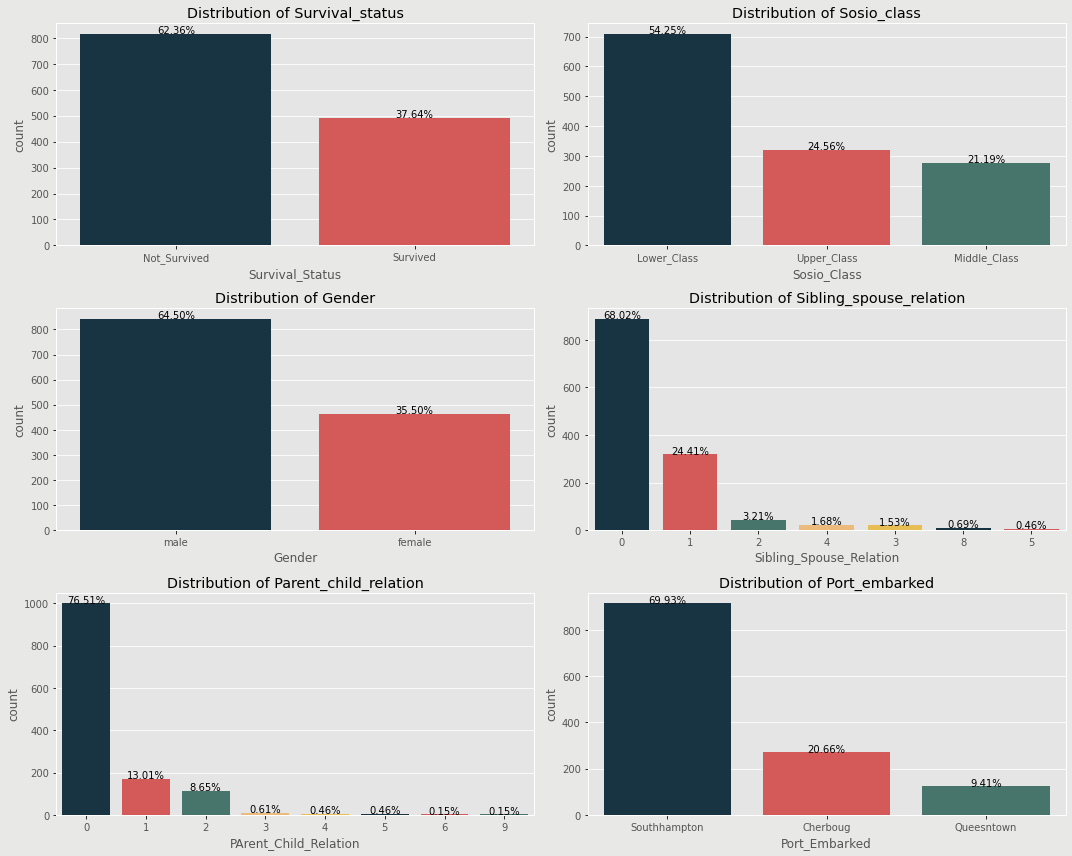

In [85]:
cat_distribution(df_titanic, categorical)

posx and posy should be finite values
posx and posy should be finite values


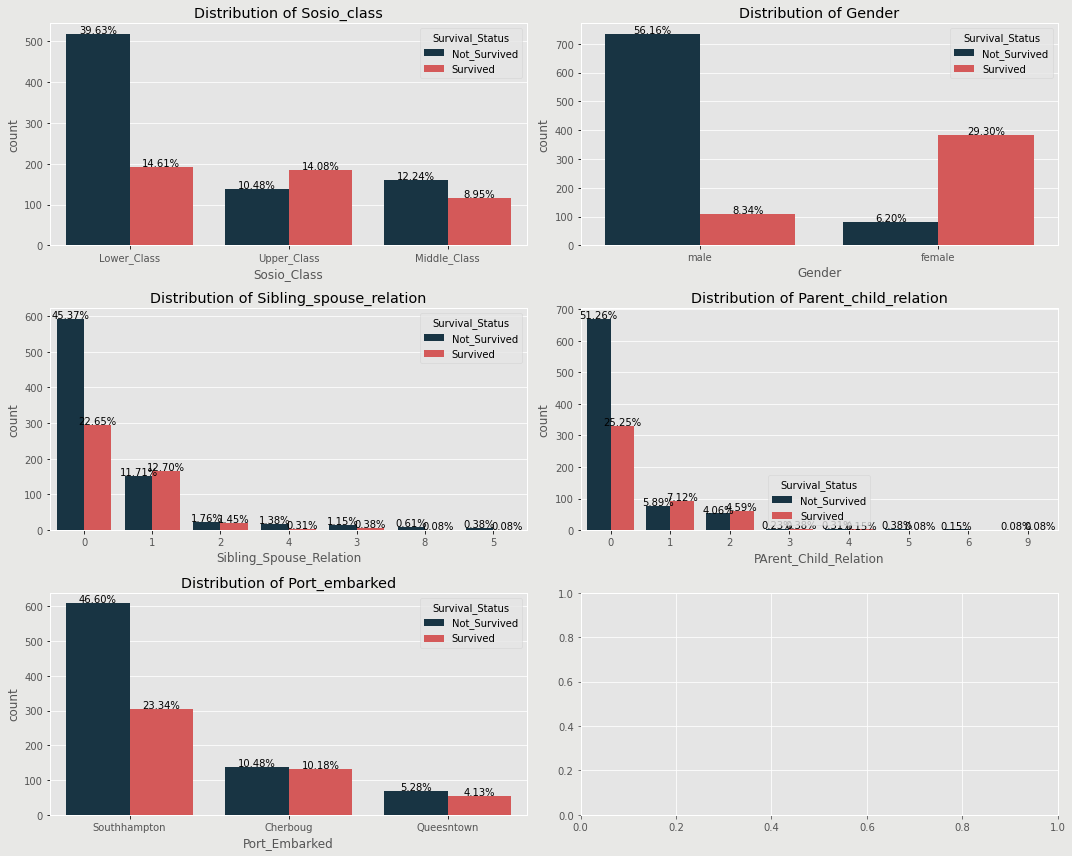

In [86]:
cat_distribution(df_titanic, categorical[1:], 'Survival_Status')

<AxesSubplot:title={'center':'Passenger Fare'}, xlabel='Fare'>

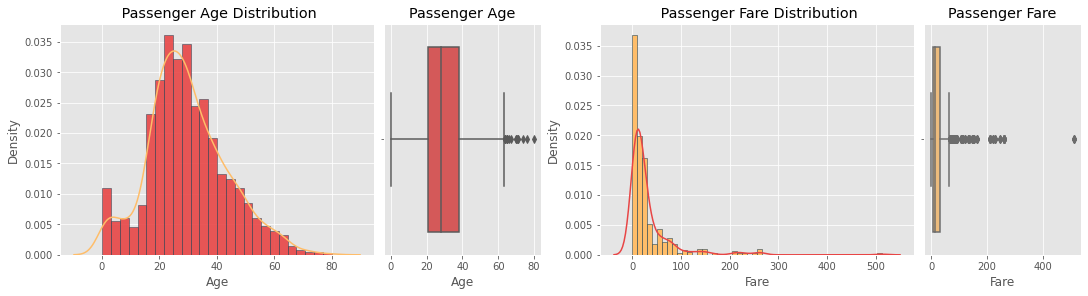

In [99]:
# Displaying continuous Data distributions:
fig = plt.figure(constrained_layout= True, figsize = (15,4))
grid = gridspec.GridSpec(ncols=6, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title(' Passenger Age Distribution')
sns.distplot(
    df_titanic['Age'],
    hist_kws ={
        'rwidth':1,
        'edgecolor': '#11364A',
        'alpha': 0.9},
    kde_kws={
        "linestyle":'solid',
        'color':custom_palet2[3]},
    color = custom_palet2[1]
        )
ax11 = fig.add_subplot(grid[0, 2:3])
ax11.set_title('Passenger Age')
sns.boxplot(df_titanic['Age'], orient='v', color= custom_palet2[1])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title(' Passenger Fare Distribution')
sns.distplot(
    df_titanic['Fare'],
    hist_kws ={
        'rwidth':1,
        'edgecolor': '#11364A',
        'alpha': 1},
    kde_kws={
        "linestyle":'solid',
        'color':custom_palet2[1]},
    color = custom_palet2[3]
        )
ax22 = fig.add_subplot(grid[0, 5:])
ax22.set_title('Passenger Fare')
sns.boxplot(df_titanic['Fare'], orient='any', color= custom_palet2[3])




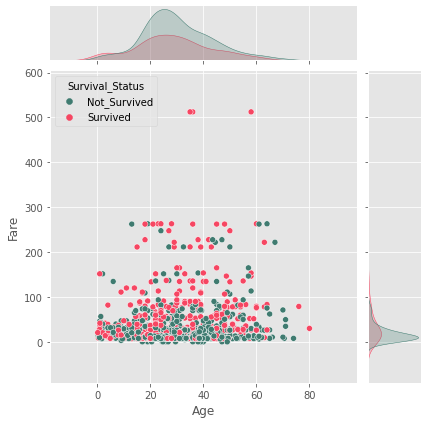

In [75]:
sns.jointplot(data=df_titanic, x="Age", y="Fare", hue="Survival_Status", palette=custom_palet4)